In [28]:
import os
import numpy as np
import matplotlib.pyplot as plt
import random

In [11]:
RAW_FILE = 'src_data/mpox_pgraph.csv'
infection_chance_per_day=[0.2,0.3,0.2,0.1]
cbgNames = set()
trans_data = {}

In [13]:
isheader = True
with open(RAW_FILE, 'r') as f:
    for line in f.readlines():
        if isheader:
            isheader = False
            continue
        cbgNames.add(line.strip().split(',')[0])
cbgNames = list(cbgNames)

In [14]:
isheader = True
with open(RAW_FILE, 'r') as f:
    for line in f.readlines():
        if isheader:
            isheader = False
            continue
        
        line = line.strip().split(',')
        fromCBG = cbgNames.index(line[0])
        toCBG = cbgNames.index(line[1])
        if fromCBG not in trans_data:
            trans_data[fromCBG] = []
            trans_data[fromCBG].append([])
            trans_data[fromCBG].append([])
        trans_data[fromCBG][0].append(toCBG)
        trans_data[fromCBG][1].append(float(line[3]))

In [15]:
nCBG = len(trans_data)

In [16]:
def idx_with_rand_probs(probs):
    val = random.random()
    cumuProb = 0
    for i, prob in enumerate(probs):
        cumuProb += prob
        if val < cumuProb:
            return i
    return -1

In [17]:
active_cases = []
cbgSIR = {'S':np.ones(nCBG)*10000, 'I':np.zeros(nCBG), 'R':np.zeros(nCBG)}

In [63]:
def initCase():
    newCaseIdx = random.randint(0, nCBG - 1)
    active_cases.append([newCaseIdx, 0])
    cbgSIR['S'][newCaseIdx] -= 1
    cbgSIR['I'][newCaseIdx] += 1

In [77]:
def nextDay():
    i = 0
    while i < len(active_cases):
        print(active_cases)
        case = active_cases[i]
        # Recovered
        if case[1] == len(infection_chance_per_day):
            cbgIdx = case[0]
            cbgSIR['I'][cbgIdx] -= 1
            cbgSIR['R'][cbgIdx] += 1

            active_cases.pop(i)
            print('Recovered')
            continue
        
        
        infectionChance = infection_chance_per_day[case[1]]
        case[1] += 1
        i += 1
        
        if random.random() > infectionChance:
            print('Unlucky')
            continue
        
        # One new case exist
        srcCBGTrans = trans_data[case[0]]
        desCBGIdx = idx_with_rand_probs(srcCBGTrans[1])
        desCBG = srcCBGTrans[0][desCBGIdx]

        active_cases.append([desCBG, 0])
        cbgSIR['S'][desCBG] -= 1
        cbgSIR['I'][desCBG] += 1
        
        print('Infected')
        

[[360, 0]]
Infected
[[360, 1], [387, 0]]
Unlucky
[[360, 1], [387, 1]]
Unlucky
[[360, 2], [387, 1]]
Infected
[[360, 2], [387, 2], [414, 0]]
Infected
[[360, 2], [387, 2], [414, 1], [414, 0]]
Unlucky
[[360, 2], [387, 2], [414, 1], [414, 1]]
Infected
[[360, 3], [387, 2], [414, 1], [414, 1], [414, 0]]
Infected
[[360, 3], [387, 3], [414, 1], [414, 1], [414, 0], [434, 0]]
Unlucky
[[360, 3], [387, 3], [414, 2], [414, 1], [414, 0], [434, 0]]
Unlucky
[[360, 3], [387, 3], [414, 2], [414, 2], [414, 0], [434, 0]]
Unlucky
[[360, 3], [387, 3], [414, 2], [414, 2], [414, 1], [434, 0]]
Unlucky
[[360, 3], [387, 3], [414, 2], [414, 2], [414, 1], [434, 1]]
Unlucky
[[360, 4], [387, 3], [414, 2], [414, 2], [414, 1], [434, 1]]
Unlucky
[[360, 4], [387, 4], [414, 2], [414, 2], [414, 1], [434, 1]]
Unlucky
[[360, 4], [387, 4], [414, 3], [414, 2], [414, 1], [434, 1]]
Unlucky
[[360, 4], [387, 4], [414, 3], [414, 3], [414, 1], [434, 1]]
Unlucky
[[360, 4], [387, 4], [414, 3], [414, 3], [414, 2], [434, 1]]
Unlucky
[[3

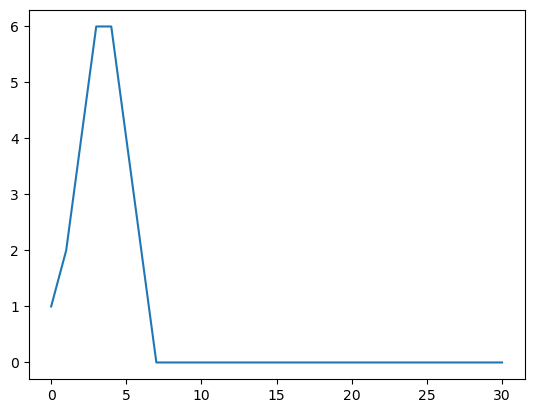

In [79]:
IPerDay = []

days = [0]

initCase()
    
IPerDay.append(1)
for i in range(30):
    nextDay()
    IPerDay.append(np.sum(cbgSIR['I']))
    
    days.append(i+1)
plt.plot(days, IPerDay)
